# Maitrise de Porjet
## Partie SD


Importation ds librairies et modules utiles

In [1618]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import random
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
plt.style.use('bmh')

Importation de la base des données

In [1619]:
h = pd.read_csv("données.csv",sep=";")

In [1620]:
h

,Source.Name,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe
0,76575_000AB.csv,2022-360375,21/04/2022,1,Vente,260000.0,26.0,None,RUE DELILLE,582.0,...,129.0,4.0,S,sols,None,None,351.0,1.071855,49.401886,000AB
1,76575_000AB.csv,2022-360375,21/04/2022,1,Vente,260000.0,26.0,None,RUE DELILLE,582.0,...,NaN,0.0,S,sols,None,None,351.0,1.071855,49.401886,000AB
2,76575_000AB.csv,2021-1180016,10/05/2021,1,Vente,160000.0,13.0,None,RUE ALFRED DE MUSSET,40.0,...,64.0,4.0,S,sols,None,None,452.0,1.070963,49.402764,000AB
3,76575_000AB.csv,2021-1177880,14/01/2021,1,Vente,174000.0,21.0,None,RUE PAUL VERLAINE,1920.0,...,64.0,4.0,S,sols,None,None,498.0,1.070475,49.403622,000AB
4,76575_000AB.csv,2021-1177880,14/01/2021,1,Vente,174000.0,21.0,None,RUE PAUL VERLAINE,1920.0,...,NaN,0.0,S,sols,None,None,498.0,1.070475,49.403622,000AB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2967,76575_000BW.csv,2019-1112209,11/02/2019,1,Vente,56460.0,620.0,None,RUE ISAAC NEWTON,1222.0,...,11002.0,0.0,S,sols,None,None,29103.0,NaN,NaN,000BW
2968,76575_000BW.csv,2018-1037104,28/12/2018,1,Vente,1000000.0,9010.0,None,CHE DE LA MARE AUX SANGSUES,1605.0,...,87.0,3.0,S,sols,None,None,3973.0,1.059789,49.390736,000BW
2969,76575_000BW.csv,2018-1037104,28/12/2018,1,Vente,1000000.0,9010.0,None,CHE DE LA MARE AUX SANGSUES,1605.0,...,1048.0,0.0,S,sols,None,None,3973.0,1.059789,49.390736,000BW
2970,76575_000BW.csv,2018-1033451,04/07/2018,1,Vente,165600.0,NaN,None,AV DE L UNIVERSITE,2359.0,...,NaN,NaN,S,sols,None,None,1465.0,1.076805,49.385296,000BW


In [1621]:
h.describe()

,numero_disposition,valeur_fonciere,adresse_numero,adresse_code_voie,code_postal,code_commune,code_departement,nombre_lots,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
count,2972.000000,2.922000e+03,2487.000000,2645.000000,2957.0,2972.0,2972.0,2972.000000,1613.000000,2197.000000,2515.000000,2945.000000,2945.000000
mean,1.067968,2.952035e+05,986.122236,1352.046881,76800.0,76575.0,76.0,0.233176,182.208308,2.623578,998.296620,1.091068,49.387863
std,0.302725,1.440939e+06,2741.944781,631.804460,0.0,0.0,0.0,0.670935,921.206607,2.141372,3315.373056,0.015597,0.009367
min,1.000000,1.500000e-01,1.000000,10.000000,76800.0,76575.0,76.0,0.000000,8.000000,0.000000,1.000000,1.059257,49.364717
25%,1.000000,8.600000e+04,7.000000,940.000000,76800.0,76575.0,76.0,0.000000,63.000000,0.000000,179.000000,1.076010,49.379939
50%,1.000000,1.455000e+05,21.000000,1420.000000,76800.0,76575.0,76.0,0.000000,79.000000,3.000000,371.000000,1.093953,49.389846
75%,1.000000,2.150000e+05,70.000000,1870.000000,76800.0,76575.0,76.0,0.000000,97.000000,4.000000,535.000000,1.105408,49.395582
max,5.000000,3.685578e+07,9789.000000,2450.000000,76800.0,76575.0,76.0,10.000000,16673.000000,22.000000,65177.000000,1.117740,49.405776


Netoyage des données 

In [1622]:
h=h.replace(['None','nan'],float('NaN'))

In [1623]:
h.isnull().any()

Source.Name                     False
id_mutation                     False
date_mutation                   False
numero_disposition              False
nature_mutation                 False
valeur_fonciere                  True
adresse_numero                   True
adresse_suffixe                  True
adresse_nom_voie                 True
adresse_code_voie                True
code_postal                      True
code_commune                    False
nom_commune                     False
code_departement                False
ancien_code_commune              True
ancien_nom_commune               True
id_parcelle                     False
ancien_id_parcelle               True
numero_volume                    True
lot1_numero                      True
lot1_surface_carrez              True
lot2_numero                      True
lot2_surface_carrez              True
lot3_numero                      True
lot3_surface_carrez              True
lot4_numero                      True
lot4_surface

In [1624]:
h=h[['valeur_fonciere','surface_reelle_bati','nombre_pieces_principales','surface_terrain','longitude','latitude','code_type_local']]

h.isnull().sum()

valeur_fonciere                50
surface_reelle_bati          1359
nombre_pieces_principales     775
surface_terrain               457
longitude                      27
latitude                       27
code_type_local               773
dtype: int64

In [1625]:
h.columns[h.isnull().any()]

Index(['valeur_fonciere', 'surface_reelle_bati', 'nombre_pieces_principales',
       'surface_terrain', 'longitude', 'latitude', 'code_type_local'],
      dtype='object')

In [1626]:
h.isnull().sum()

valeur_fonciere                50
surface_reelle_bati          1359
nombre_pieces_principales     775
surface_terrain               457
longitude                      27
latitude                       27
code_type_local               773
dtype: int64

In [1627]:
h.isnull().sum().sum()

3468

In [1628]:
column_with_nan = h.columns[h.isnull().any()]
for column in column_with_nan:
  print(column, h[column].isnull().sum())

if h[column].isnull().sum()*100.0/h.shape[0] > 50:
  h.drop(column,1, inplace=True)


valeur_fonciere 50
surface_reelle_bati 1359
nombre_pieces_principales 775
surface_terrain 457
longitude 27
latitude 27
code_type_local 773


In [1629]:
h.index[h.isnull().any(axis=1)]
index_with_nan = h.index[h.isnull().any(axis=1)]
index_with_nan.shape
h.drop(index_with_nan,0, inplace=True)
h.shape
h

C:\Users\Ordi\AppData\Local\Temp\ipykernel_26100\3329569822.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  h.drop(index_with_nan,0, inplace=True)


,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,code_type_local
0,260000.0,129.0,4.0,351.0,1.071855,49.401886,1
2,160000.0,64.0,4.0,452.0,1.070963,49.402764,1
3,174000.0,64.0,4.0,498.0,1.070475,49.403622,1
5,200000.0,18.0,1.0,105.0,1.074902,49.403036,2
6,200000.0,68.0,0.0,105.0,1.074902,49.403036,4
...,...,...,...,...,...,...,...
2951,189300.0,80.0,4.0,354.0,1.071759,49.399769,1
2964,1.2,3544.0,0.0,17330.0,1.077618,49.385026,4
2968,1000000.0,87.0,3.0,3973.0,1.059789,49.390736,2
2969,1000000.0,1048.0,0.0,3973.0,1.059789,49.390736,4


In [1630]:
h=h.reset_index(drop=True)



# Suppression des Valeurs aberrantes
## Visualisation
### Utilisation de la boîte à moustache

il capture le résumé des données de manière efficace et efficiente avec seulement une simple boîte et des moustaches. Boxplot résume les exemples de données à l’aide des 25e, 50e et 75e centiles. On peut simplement obtenir des informations (quartiles, médianes et valeurs aberrantes) sur l’ensemble de données en regardant simplement sa boîte à moustaches.

(array([ 467,  468,  469,  470,  471,  472,  474,  480,  481,  482,  483,
        489, 1167, 1170, 1171, 1207, 1215, 1260, 1261], dtype=int64),)


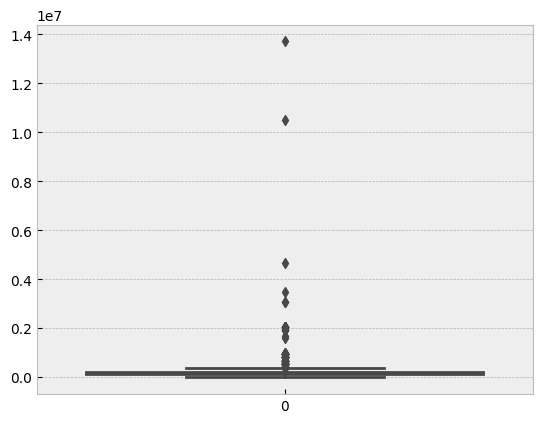

In [1631]:
# Box Plot
sns.boxplot(h['valeur_fonciere'])
# Position of the Outlier
print(np.where(h['valeur_fonciere']>1000000))
Bye=np.where(h['valeur_fonciere']>1000000)
h.drop(Bye[0], inplace = True)


(array([478], dtype=int64),)


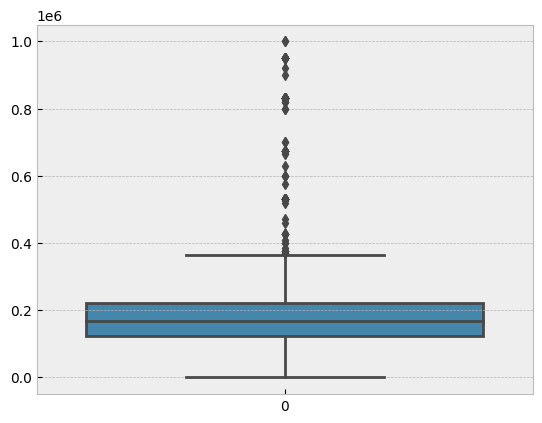

In [1632]:
sns.boxplot(h['valeur_fonciere'])
print(np.where(h['valeur_fonciere']<1))
Bye2=np.where(h['valeur_fonciere']<1)
h.drop(Bye2[0], inplace = True)
h['code_type_local']=pd.to_numeric(h['code_type_local'],downcast="float")
h=h.drop(h[h['code_type_local'] == 3 ].index)
h=h.drop(h[h['code_type_local'] == 4 ].index)


<AxesSubplot: >

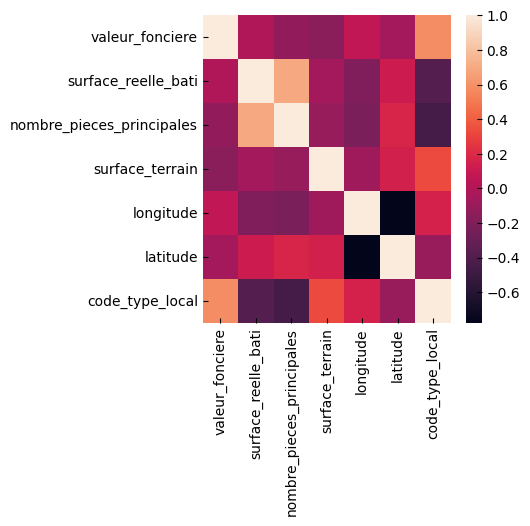

In [1633]:
plt.figure(figsize=(4,4))
sns.heatmap(h.corr())


In [1634]:
prix=h.iloc[:,0].values


#prix=np.log(prix)

In [1635]:
h

,valeur_fonciere,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,code_type_local
0,260000.0,129.0,4.0,351.0,1.071855,49.401886,1.0
1,160000.0,64.0,4.0,452.0,1.070963,49.402764,1.0
2,174000.0,64.0,4.0,498.0,1.070475,49.403622,1.0
3,200000.0,18.0,1.0,105.0,1.074902,49.403036,2.0
5,180000.0,108.0,5.0,348.0,1.071647,49.401956,1.0
...,...,...,...,...,...,...,...
1317,145000.0,74.0,5.0,374.0,1.072432,49.400659,1.0
1318,262500.0,102.0,5.0,434.0,1.069653,49.399310,1.0
1319,130000.0,64.0,4.0,369.0,1.072534,49.400600,1.0
1320,189300.0,80.0,4.0,354.0,1.071759,49.399769,1.0


# Construction du modèle

In [1636]:
X=h[['surface_reelle_bati','nombre_pieces_principales','surface_terrain','longitude','latitude','code_type_local']]

y=h['valeur_fonciere']
X.head()

,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,code_type_local
0,129.0,4.0,351.0,1.071855,49.401886,1.0
1,64.0,4.0,452.0,1.070963,49.402764,1.0
2,64.0,4.0,498.0,1.070475,49.403622,1.0
3,18.0,1.0,105.0,1.074902,49.403036,2.0
5,108.0,5.0,348.0,1.071647,49.401956,1.0


# Train Linear Regression Model


In [1637]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model  import Lasso
from sklearn.model_selection  import RepeatedKFold
from sklearn.model_selection import cross_val_score

In [1638]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size =0.3)

In [1639]:
model = LinearRegression()
score=cross_val_score(model,X_train,y_train,cv=5)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
score

array([0.55903314, 0.38259048, 0.54189379, 0.50491317, 0.56362207])

In [1640]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_predict)
score

0.5823617559650495

In [1641]:
d = {'Prediction PSF':y_predict, 'Actual PSF': y_test}

In [1642]:
output = pd.DataFrame(d)
output.head()

,Prediction PSF,Actual PSF
62,258447.363772,280000.0
635,101431.362253,105000.0
412,205454.700706,182400.0
764,120397.279824,100000.0
13,471034.905746,427600.0


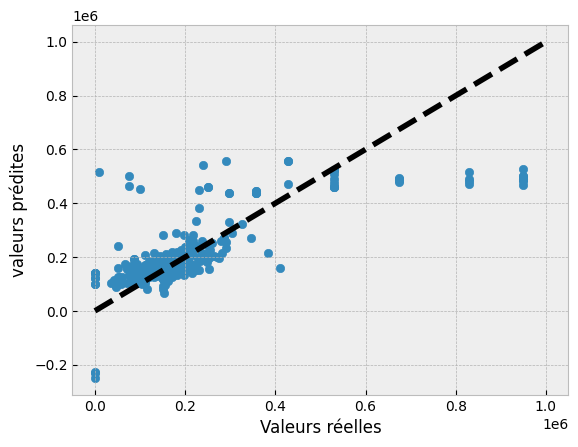

In [1643]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Valeurs réelles')
ax.set_ylabel('valeurs prédites')
plt.show()

# Sauvegarde du modèle

In [1644]:
import pickle

with open ('pickle_model','wb') as file : pickle.dump(model,file)

with open ('pickle_model','rb') as file : 
    pickle_file=pickle.load(file)

pickle_file.predict([[100,3,200,1.07,49,2]])

c:\Users\Ordi\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([128360.51295824])